In [1]:
#hazır kod üzerinden çalışıldı 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("8-fraud_detection.csv")   #alışverişin dolandırıcılık olup olmadığı verilerinin olduğu bir data

In [3]:
df.columns

Index(['transaction_amount', 'transaction_risk_score', 'is_fraud'], dtype='object')

In [4]:
df.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_amount      10000 non-null  float64
 1   transaction_risk_score  10000 non-null  float64
 2   is_fraud                10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [6]:
df["is_fraud"].unique()

array([0, 1])

In [7]:
df["is_fraud"].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

In [8]:
X=df.drop('is_fraud',axis=1)
y=df['is_fraud']

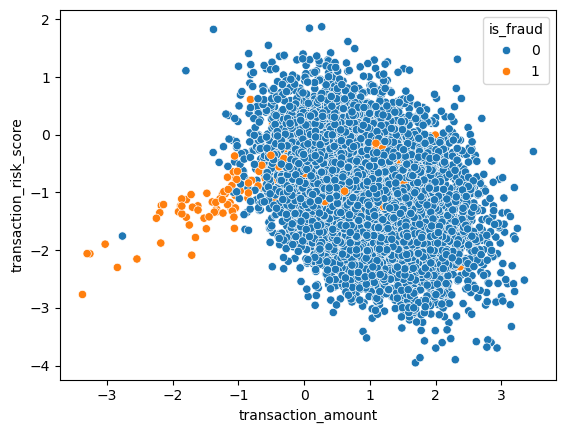

In [9]:
sns.scatterplot(x=X["transaction_amount"],y=X["transaction_risk_score"], hue=y) #dengesiz dataset
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [11]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [12]:
#hyperparameter tuning with class weights to handle imbalance
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]   # 0=w ve 1=y 

In [13]:
class_weight  #bir sınıfa daha fazla ağırlık vererek hesaplama yapabildiğimiz bir parametre

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [14]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [16]:
import warnings
warnings.filterwarnings('ignore')         #uyarı mesajlarını gizler
grid.fit(X_train,y_train)         

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [17]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'saga'}

In [18]:
y_pred=grid.predict(X_test)

In [19]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [21]:
score=accuracy_score(y_pred,y_test)
print("score: ", score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n " , confusion_matrix(y_pred,y_test))

score:  0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2481
           1       0.42      0.84      0.56        19

    accuracy                           0.99      2500
   macro avg       0.71      0.92      0.78      2500
weighted avg       0.99      0.99      0.99      2500

confusion matrix: 
  [[2459   22]
 [   3   16]]


In [22]:
# roc, auc      #ileri seviye kısmı açıklamayı çalış

The ROC Curve is a graphical representation of a classification model’s performance across different threshold values. It plots the True Positive Rate (Recall) on the Y-axis against the False Positive Rate (1 - Specificity) on the X-axis.
	•	A model that perfectly distinguishes between classes has a curve that reaches the top-left corner.
	•	The closer the curve is to the top-left, the better the model.
	•	The area under the ROC curve (AUC) quantifies this performance:
	•	AUC = 1 → perfect classifier
	•	AUC = 0.5 → random guessing

ROC is especially useful for imbalanced datasets, as it evaluates the model independent of class distribution or threshold.

In [23]:
model_prob=grid.predict_proba(X_test)  #olasılıkları verir bu fonksiyon pozitif ve negatif olasılıkları

In [24]:
model_prob

array([[0.99586576, 0.00413424],
       [0.85284477, 0.14715523],
       [0.95230733, 0.04769267],
       ...,
       [0.98899023, 0.01100977],
       [0.98454606, 0.01545394],
       [0.99758902, 0.00241098]])

In [25]:
##  probabilities for the positive class
model_prob=model_prob[:,1]

In [35]:
model_prob

array([0.00413424, 0.14715523, 0.04769267, ..., 0.01100977, 0.01545394,
       0.00241098])

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [27]:
model_auc=roc_auc_score(y_test,model_prob)

In [28]:
model_auc

np.float64(0.7392898371029116)

In [29]:
# model false positive rate
# model true positive rate
#tresholds= eşik
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [30]:
thresholds

array([           inf, 9.30474441e-01, 5.77516206e-01, 5.43593549e-01,
       5.36180796e-01, 3.14020034e-01, 3.13244553e-01, 2.63849063e-01,
       2.62198345e-01, 1.82334892e-01, 1.81444753e-01, 1.81255707e-01,
       1.81155643e-01, 1.40617117e-01, 1.40488314e-01, 8.37811000e-02,
       8.36649640e-02, 6.24152743e-02, 6.23702023e-02, 5.87484919e-02,
       5.85787313e-02, 4.66722232e-02, 4.66454820e-02, 4.44111369e-02,
       4.44009775e-02, 3.15400637e-02, 3.14997010e-02, 2.58163277e-02,
       2.57802953e-02, 2.53616967e-02, 2.53574797e-02, 2.37951080e-02,
       2.37809526e-02, 1.76105146e-02, 1.75869246e-02, 1.49609863e-02,
       1.49483956e-02, 1.34490502e-02, 1.34150035e-02, 1.10619843e-02,
       1.10282463e-02, 1.02109186e-02, 1.01929606e-02, 9.12351386e-03,
       9.07142773e-03, 8.79344549e-03, 8.78187436e-03, 7.86679731e-03,
       7.85495675e-03, 5.66741617e-04])

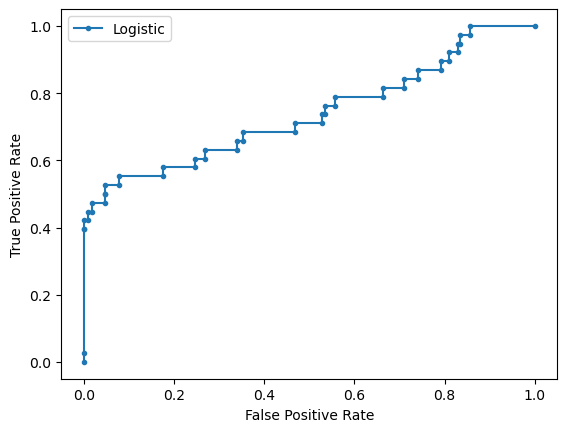

In [31]:
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

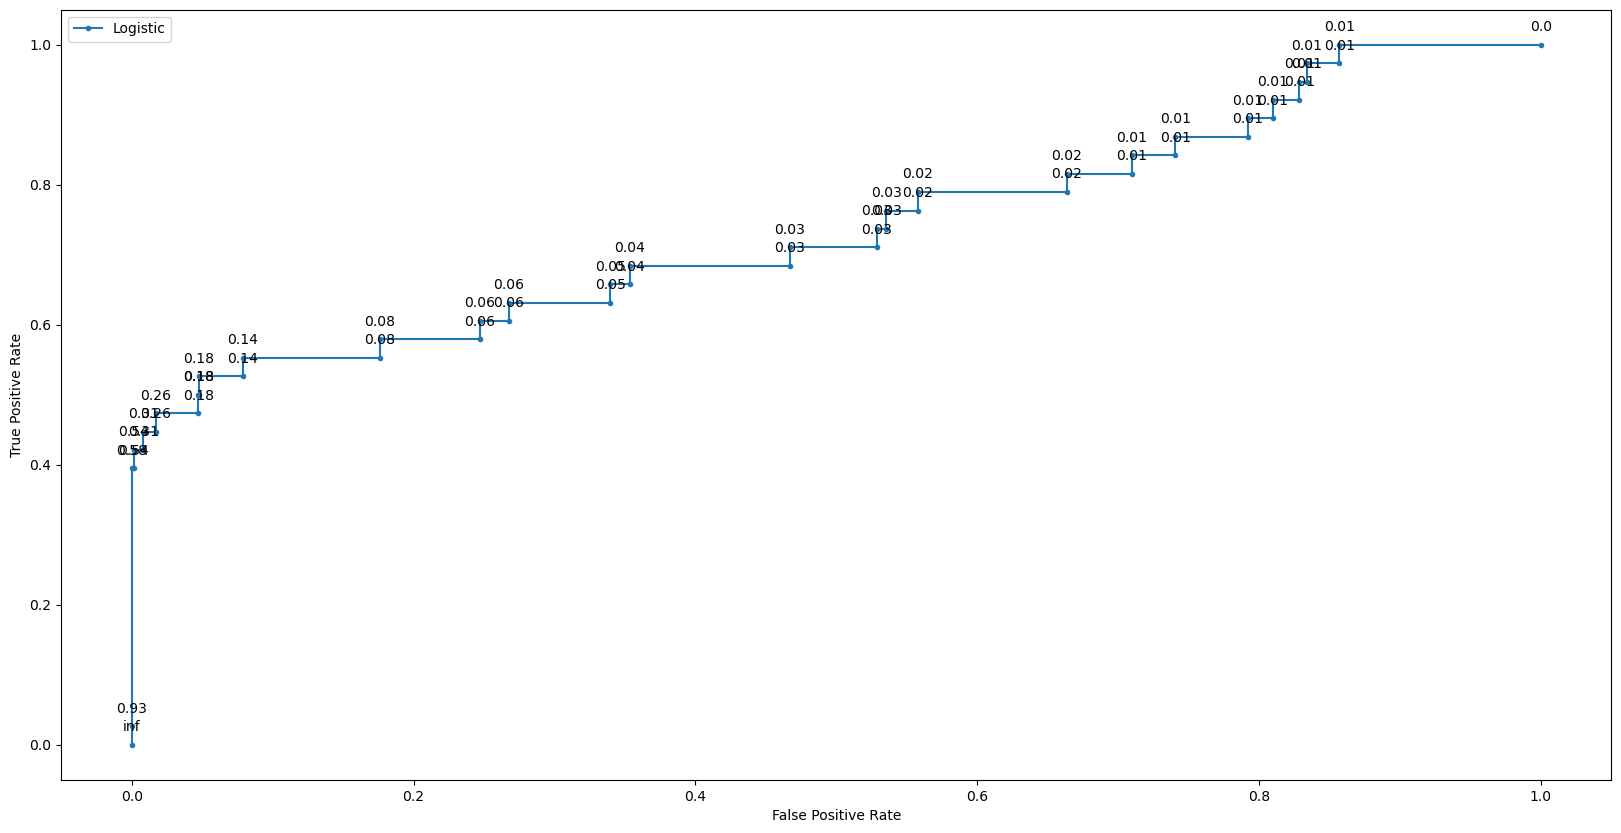

In [32]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot ROC curve
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate each point with the threshold
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', (fpr, tpr), textcoords="offset points", xytext=(0,10), ha='center')

# Labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Show the plot
plt.show()

In [33]:
# Pick a custom threshold (e.g., from your annotated ROC curve)
custom_threshold = 0.2  # You can change this to what you chose

# Predict using custom threshold
y_pred_custom = (model_prob >= custom_threshold).astype(int)
print(model_prob >= custom_threshold)
print(y_pred_custom)

# Evaluate
print(f"\n Evaluation using custom threshold = {custom_threshold}")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

[False False False ... False False False]
[0 0 0 ... 0 0 0]

 Evaluation using custom threshold = 0.2
[[2366   96]
 [  20   18]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2462
           1       0.16      0.47      0.24        38

    accuracy                           0.95      2500
   macro avg       0.57      0.72      0.61      2500
weighted avg       0.98      0.95      0.96      2500



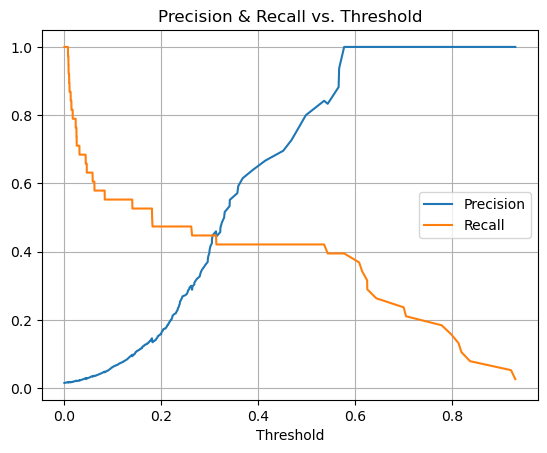

In [34]:
#If you want to find the best threshold based on precision, recall, or F1 you can plot Performance Metrics at Different Thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, model_prob)

# Plot precision and recall vs threshold
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision & Recall vs. Threshold')
plt.grid()
plt.show()